In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pmaw import PushshiftAPI
import matplotlib.pyplot as plt
import math
from datetime import datetime
import datetime as dt
from nltk.tokenize import RegexpTokenizer, TweetTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
import re
import string
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-1c1c12436d94>:26: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
amc = pd.read_csv('data/amc_comments.csv', low_memory=False)

In [3]:
relevant_columns=['body','score','total_awards_received','created_utc','author','permalink']
amc = amc[relevant_columns]

In [6]:
from preprocessing_tuner import new_words
stopwords_list = stopwords.words('english')

In [8]:
# def new_cleaner(comment):
#     punctuation = set(string.punctuation)
#     x = comment
#     x = re.sub(r'@[\w]*', '', x) #remove @ mentions
#     x = re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)', '', x) #remove URLs and links
#     x = ''.join(ch for ch in x if ch not in punctuation) #remove punctuation
#     x = x.replace("[^a-zA-z]", " ") #remove special chars
#     x = [word.lower() for word in x.split() if word.lower() not in stopwords_list]
#     return ' '.join(x)

In [9]:
# amc['cleaned_body'] = amc['body'].map(lambda x: new_cleaner(x))

In [4]:
new_vader = SentimentIntensityAnalyzer()
# new_vader.lexicon.update(new_words)
def find_sentiment(post):
    if new_vader.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif new_vader.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

In [7]:
# amc['new_sentiment'] = amc['cleaned_body'].apply(lambda x: find_sentiment(x))
amc['new_sentiment'] = amc['body'].apply(lambda x: find_sentiment(x))

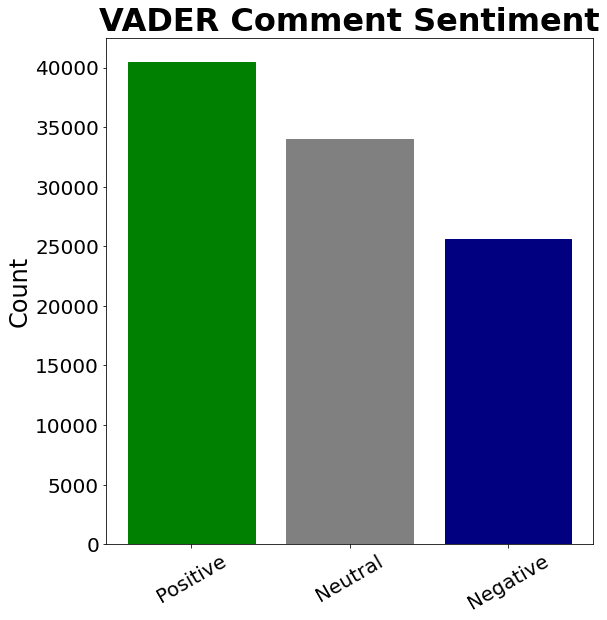

In [8]:
counts = amc['new_sentiment'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
barlist = plt.bar(['Positive','Neutral','Negative'],counts)
barlist[0].set_color('green')
barlist[1].set_color('grey')
barlist[2].set_color('navy')
ax.set_ylabel('Count', size=24)
plt.title("VADER Comment Sentiment", fontsize=32, fontweight='bold')
plt.tight_layout()
plt.tick_params(labelsize=20)
plt.xticks(rotation=30)
plt.show()

In [11]:
# amc.to_csv('data/amc_modeling_2.csv', index=False)

In [13]:
# numsents_2 = amc[['cleaned_body', 'created_utc']].copy()
# numsents_2.dropna(inplace=True)
# numsents_2['sentiments'] = numsents_2['cleaned_body'].apply(lambda x: new_vader.polarity_scores(x))
# numsents_2['Positive Sentiment'] = numsents_2['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
# numsents_2['Neutral Sentiment'] = numsents_2['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
# numsents_2['Negative Sentiment'] = numsents_2['sentiments'].apply(lambda x: x['neg']+1*(10**-6))
# numsents_2['Compound Sentiment'] = numsents_2['sentiments'].apply(lambda x: x['compound']+1*(10**-6))
# numsents_2.drop(columns=['sentiments'],inplace=True)

In [17]:
# numsents_2.to_csv('data/amc_numeric_sents.csv', index=False)

Numsents 2 failed. <br>
Although the machine learning learning classification models such as NaiveBayes, DecisionTree, RandomForest, and XGBoost did better with Modeling v2 data, this was because they likely picked up on the boosted values of the updated lexicon word list. <br> 
When it came to time series, those values distorted the numeric sentiment values. Proceeding with the original numeric sentiment values correlated with price better than using the new sentiment analyzer.